# 1. Filtros IIR. Diseño Eurístico

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [10]:
re  = np.array( [10   , 40] )
im  = np.array( [48.98, 30] )
wo  = re**2 + im**2
eps = 2*np.abs( re )

print wo, eps

[ 2499.0404  2500.    ] [20 80]


In [11]:
p = np.array(  [ np.ones( eps.shape[0] ), eps, wo ]  ).T

print p

[[  1.00000000e+00   2.00000000e+01   2.49904040e+03]
 [  1.00000000e+00   8.00000000e+01   2.50000000e+03]]


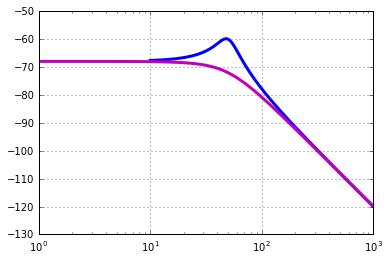

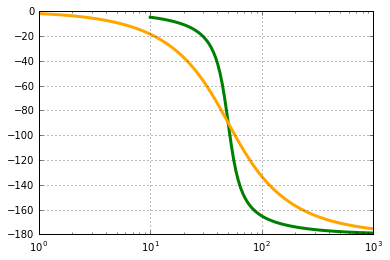

In [12]:
sy0 = signal.lti([1], p[0])
sy1 = signal.lti([1], p[1])

w0, mag0, phase0 = signal.bode(sy0)
w1, mag1, phase1 = signal.bode(sy1)

plt.figure()
plt.semilogx(w0, mag0,linewidth=3, color='b')
plt.semilogx(w1, mag1,linewidth=3, color='m')
plt.grid(True)

plt.figure()
plt.semilogx(w0, phase0, linewidth=3, color='g')
plt.semilogx(w1, phase1, linewidth=3, color='orange')
plt.grid(True)
plt.show()


In [91]:
x = np.poly1d( p[0] )
for i in p[1:]:
    x *= np.poly1d( i )

print x


   4      3       2
1 x + 16 x + 182 x + 976 x + 3721


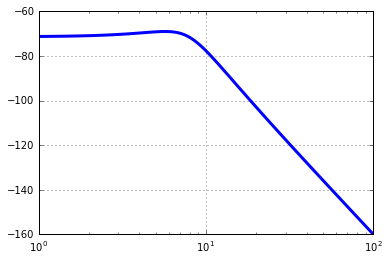

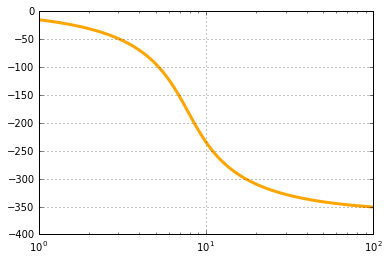

In [92]:
sy = signal.lti([1], x)

w, mag, phase = signal.bode(sy)

plt.figure()
plt.semilogx(w, mag,linewidth=3)
plt.grid(True)

plt.figure()
plt.semilogx(w, phase, linewidth=3, color='orange')
plt.grid(True)
plt.show()